## Detect Timeseries Anomalies 

Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

### Imports

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

### Aquire Data

In [2]:
df= pd.read_csv('anonymized-curriculum-access.txt', sep=" ", header=None)

df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719459 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       719459 non-null  object 
 1   1       719459 non-null  object 
 2   2       719458 non-null  object 
 3   3       719459 non-null  int64  
 4   4       674619 non-null  float64
 5   5       719459 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ MB


### Prep Data

In [4]:
# Set column names
df.columns = ['date', 'time', 'page_viewed', 'user_id', 'cohort_id', 'ip']

In [5]:
df

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
719454,2020-11-02,16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
719455,2020-11-02,16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
719456,2020-11-02,16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175
719457,2020-11-02,16:48:28,javascript-i/bom-and-dom/bom,771,62.0,172.125.226.175


In [6]:
# Create timestamp column 
df["timestamp"] = df["date"] + " " + df["time"]

# Convert timestamp column to datetime type
df.timestamp = pd.to_datetime(df.timestamp)

# Set timestamp column as index
df = df.set_index('timestamp')

# Drop date and time columns
df.drop(columns=['date', 'time'], inplace = True)

# Show data
df.head()

,page_viewed,user_id,cohort_id,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [7]:
df.describe()

,user_id,cohort_id
count,719459.000000,674619.000000
mean,392.945478,37.173660
std,211.655544,14.971385
min,1.000000,1.000000
25%,230.000000,26.000000
50%,417.000000,32.000000
75%,568.000000,53.000000
max,787.000000,62.000000


### Split into Train/Test

TypeError: unhashable type: 'numpy.ndarray'

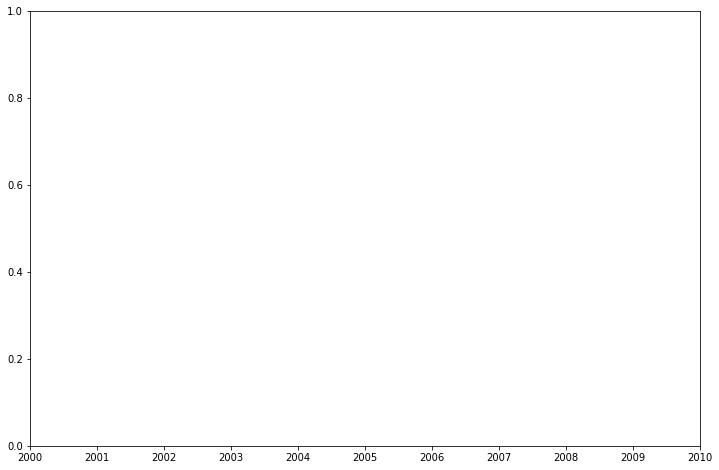

In [8]:
start_date_train = df.head(1).index[0]
end_date_train = '2019-04-17 23:30:00'
start_date_test = '2019-04-18 00:00:00'

train = df[:end_date_train]
test = df[start_date_test:]

plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)
plt.show()

### Exponential Moving Average with %b

In [ ]:
ema_short = train.ewm(span=12, adjust=False).mean()
ema_short.tail()

In [ ]:
span = 24
ema_long = train.ewm(span=span, adjust=False).mean()
ema_long.tail()

In [ ]:
# %b 
span = 24
ema_long = train.ewm(span=span, adjust=False).mean()
midband = ema_long[-1]
ub = midband + ema_long[-24:-1].std()*3
lb = midband - ema_long[-24:-1].std()*3
train.head()

In [ ]:
pct_b = pd.DataFrame({'pct_b': (train-lb)/(ub-lb)})
train = pd.DataFrame(train)

In [ ]:
train = pd.concat([train, pct_b], axis=1)

In [ ]:
train.head()

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train.pct_b)
plt.plot(train.size_mb)

## Bonus

Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff? What are Zach, Maggie, Faith, and Ryan's ids?